In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as stats

import asymNdimPdf as apdf

In [3]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

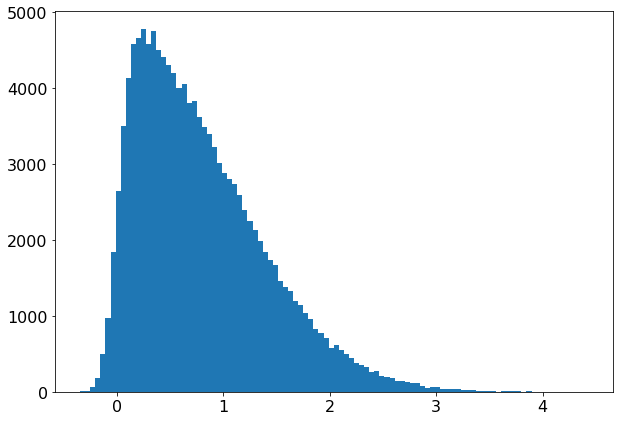

In [4]:
sn1D = apdf.ndimSkewNormal(alpha=10)
data = apdf.generateData(sn1D.pdf, n=1000000)
plt.hist(data, bins=100);

Text(0, 0.5, 'Normalized output')

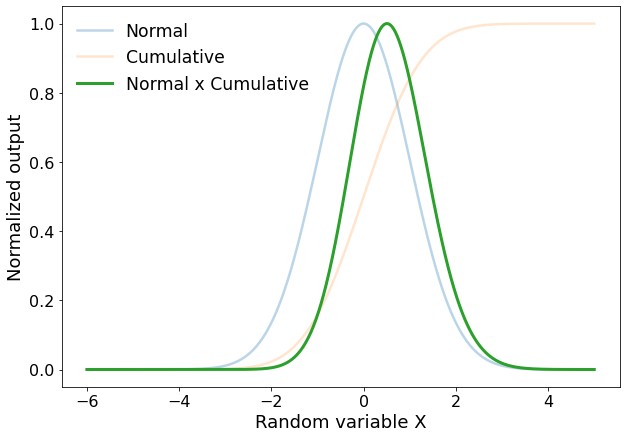

In [23]:
f1 = stats.norm.pdf
f2 = stats.norm.cdf
xs = np.linspace(-6, 5, 1000)

alpha = 1
g2 = lambda x, alpha: f2(alpha*x)
plt.plot(xs, f1(xs) / np.max(f1(xs)), label='Normal', alpha=0.3)
plt.plot(xs, g2(xs, alpha) / np.max(g2(xs, alpha)), label='Cumulative', alpha=0.2)
plt.plot(xs, f1(xs)*g2(xs, alpha) / np.max(f1(xs)*g2(xs, alpha)), label='Normal x Cumulative', linewidth=3)
plt.legend()
plt.xlabel('Random variable X')
plt.ylabel('Normalized output')

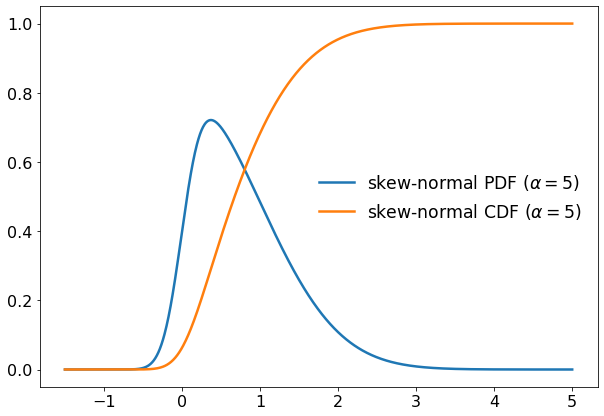

In [26]:
xs = np.linspace(-1.5, 5, 1000)
sn1D = apdf.ndimSkewNormal(alpha=5)
plt.plot(xs, sn1D.pdf(xs), label='skew-normal PDF ($\\alpha=5$)');
plt.plot(xs, sn1D.cdf1D(xs), label='skew-normal CDF ($\\alpha=5$)');
plt.legend();

In [27]:
# Comparing function and numerically computed quantities
mean = integrate.quad(lambda x: x*sn1D.pdf(x), -10, 10)[0]
mode = optimize.minimize_scalar(lambda x: -np.abs(sn1D.pdf(x))).x
std  = np.sqrt(integrate.quad(lambda x: (x-mean)**2 * sn1D.pdf(x), -10, 10)[0])
m3 = integrate.quad(lambda x: x**3 * sn1D.pdf(x), -10, 10)[0]
skew = 1/std**3 * (m3 - 3*mean*std**2 - mean**3)

print('Mean: {:.3f} vs {:.3f}'.format(sn1D.mean1D(), mean))
print('Mode: {:.3f} vs {:.3f}'.format(sn1D.mode1D(), mode))
print('Std : {:.3f} vs {:.3f}'.format(sn1D.std1D() , std ))
print('Skew: {:.3f} vs {:.3f}'.format(sn1D.skew1D(), skew))

Mean: 0.782 vs 0.782
Mode: 0.375 vs 0.371
Std : 0.623 vs 0.623
Skew: 0.851 vs 0.851


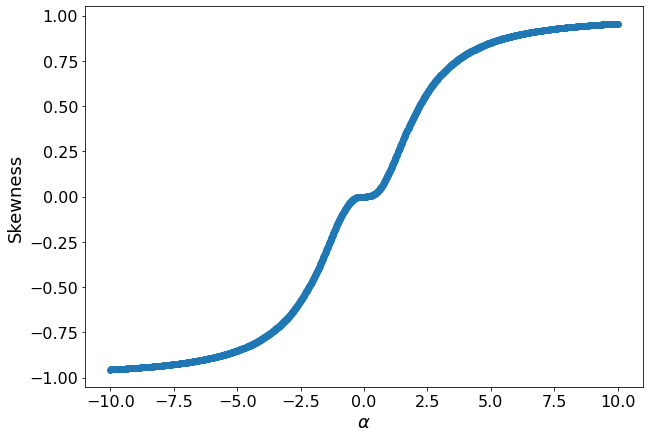

In [28]:
alphas = np.linspace(-10, 10, 1000)
skew = [apdf.ndimSkewNormal(alpha=a).skew1D() for a in alphas]
plt.plot(alphas, skew, 'o');
plt.xlabel('$\\alpha$')
plt.ylabel('Skewness');

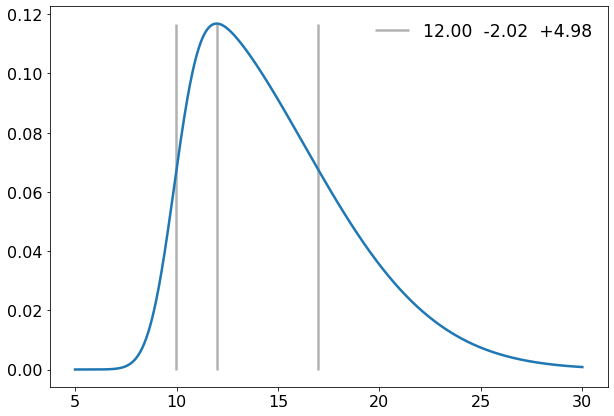

In [29]:
def plotSN(loc, scale, alpha, xmin=-5, xmax=5):
    
    # PDF
    sn = apdf.ndimSkewNormal(loc=loc, scale=scale, alpha=alpha)
    
    # Error parameters
    c, n, p = sn.measAsymError()
    
    x = np.linspace(xmin, xmax, 1000)
    plt.plot(x, sn.pdf(x))
    plt.vlines(x=[c-n, c, c+p], ymin=[0]*3, ymax=[np.max(sn.pdf(x))]*3, 
               label='{:.2f}  -{:.2f}  +{:.2f}'.format(c, n, p), alpha=0.3
              )
    plt.legend()
    
loc, scale, alpha = apdf.paramFromMeas(12, 2, 5)
plotSN(loc, scale, alpha, xmin=5, xmax=30)

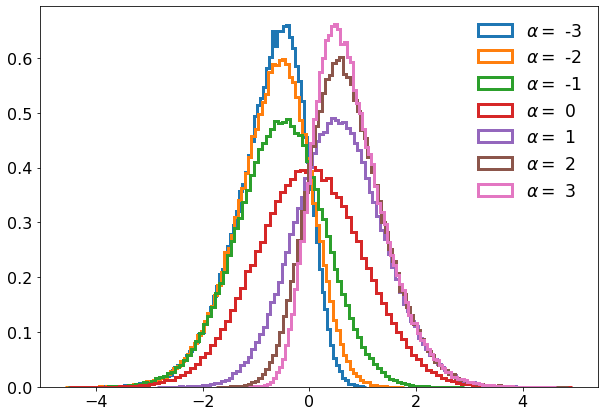

In [30]:
plt.figure(figsize=(10, 7))
for a in [-3, -2, -1, 0, 1, 2, 3]:
    f = apdf.ndimSkewNormal(alpha=a).pdf
    data = apdf.generateData(f, n=1000000)
    plt.hist(data, bins=100, histtype='step', label='$\\alpha=$ ' + '{}'.format(a), density=True, linewidth=3)
plt.legend();

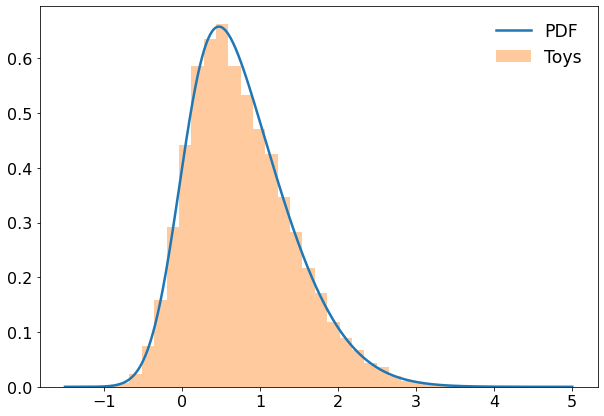

In [31]:
f = apdf.ndimSkewNormal(alpha=3).pdf
xs = np.linspace(-1.5, 5, 1000)
plt.plot(xs, f(xs), label='PDF');
plt.hist(apdf.generateData(f, n=100000), density=True, bins=30, alpha=0.4, label='Toys')
plt.legend();

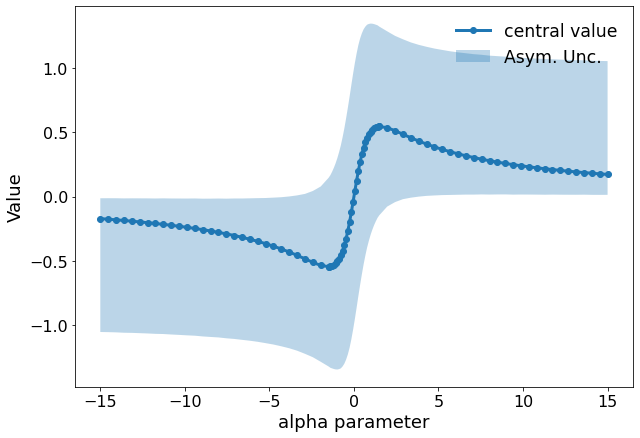

In [32]:
# Draw the most probable value and the errors as function of skewnewss
cVals, eNegs, ePoss = [], [], []

alphas = np.concatenate(
    (np.linspace(-15 , -1.5,  30),
     np.linspace(-1.5,  1.5,  30),
     np.linspace( 1.5,   15,  30),
))

for a in alphas:
    v, m, p = apdf.ndimSkewNormal(alpha=a).measAsymError()
    cVals.append(v)
    eNegs.append(m)
    ePoss.append(p)
    
# Numpy array conversion
cVals, eNegs, ePoss = np.array(cVals), np.array(eNegs), np.array(ePoss)

# Plot
plt.plot(alphas, cVals, label='central value', linewidth=3, marker='o')
plt.fill_between(alphas, y1=cVals-eNegs, y2=cVals+ePoss, label='Asym. Unc.', alpha=0.3)
plt.xlabel('alpha parameter')
plt.ylabel('Value')
plt.legend();